In [1]:

# Default locations if parameter not passed
benchmark_data_path = "big_matrix.pkl"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from rich import print as rprint
import seaborn as sns
import os
from scipy.stats import bootstrap

benchmark_data = pickle.load(open(benchmark_data_path, "rb"))

df = pd.DataFrame(benchmark_data["dataframe"])


rprint(df.columns)
rprint(df.head())
rprint(df.tail())

Index(['name', 'biggest_matrix', 'full_output', 'node_count', 'simu_rr',
       'hosts', 'time'],
      dtype='object')

name  biggest_matrix  \
0             big-matrix             NaN   
1  simulator-matrix-feed             4.0   
2  simulator-matrix-feed             4.0   
3  simulator-matrix-feed             4.0   

                                         full_output  node_count  simu_rr  \
0                                                NaN         4.0      NaN   
1  Time Simulation (microseconds) : 4507 \nDistan...         NaN      2.0   
2  Time Simulation (microseconds) : 4475 \nDistan...         NaN      3.0   
3  Time Simulation (microseconds) : 4448 \nDistan...         NaN      4.0   

                                             hosts       time  
0  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4  49.558152  
1  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.397851  
2  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.390977  
3  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.395532

name  biggest_matrix  \
0             big-matrix             NaN   
1  simulator-matrix-feed             4.0   
2  simulator-matrix-feed             4.0   
3  simulator-matrix-feed             4.0   

                                         full_output  node_count  simu_rr  \
0                                                NaN         4.0      NaN   
1  Time Simulation (microseconds) : 4507 \nDistan...         NaN      2.0   
2  Time Simulation (microseconds) : 4475 \nDistan...         NaN      3.0   
3  Time Simulation (microseconds) : 4448 \nDistan...         NaN      4.0   

                                             hosts       time  
0  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4  49.558152  
1  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.397851  
2  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.390977  
3  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   0.395532

In [3]:
sns.set_theme()

colors = [
    "#7f7f7f",  # grey
    "#621dac",  # main purple
    "#c5702d",  # orange
    "#000000",  # black,
    "#099892",  # teal
    "#ffd400",  # yellow
    "#7e57c4",  # pink/purple,
]
colors_backup = colors.copy()

In [4]:
def calculate_bootstrap_error(data):
    n_runs = benchmark_data["config"].metadata.runs
    if n_runs < 2:
        return 0
    res = bootstrap(
        (data,), np.mean, confidence_level=0.95, n_resamples=1000, method="basic"
    )
    return res.standard_error

In [5]:
bench_names = df["name"].unique()
run_metadata = benchmark_data["config"].applications

for bench in bench_names:
    bench_metadata = run_metadata[bench]
    n_runs = benchmark_data["config"].metadata.runs
    print(f"Benchmark: {bench} - Runs: {n_runs}")
    # print(bench_metadata)
    df_bench = df[df["name"] == bench]
    for idx, row in df_bench.iterrows():
        print(f"--- Row {idx} ---")
        for col, val in row.items():
            print(f"{col}: {val}")   # printing val directly never truncates
        print()




Benchmark: big-matrix - Runs: 1
--- Row 0 ---
name: big-matrix
biggest_matrix: nan
full_output: nan
node_count: 4.0
simu_rr: nan
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
time: 49.55815173685551

Benchmark: simulator-matrix-feed - Runs: 1
--- Row 1 ---
name: simulator-matrix-feed
biggest_matrix: 4.0
full_output: Time Simulation (microseconds) : 4507 
Distance : 0.321216


node_count: nan
simu_rr: 2.0
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
time: 0.39785116096027195

--- Row 2 ---
name: simulator-matrix-feed
biggest_matrix: 4.0
full_output: Time Simulation (microseconds) : 4475 
Distance : 0.194613


node_count: nan
simu_rr: 3.0
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
time: 0.3909768050070852

--- Row 3 ---
name: simulator-matrix-feed
biggest_matrix: 4.0
full_output: Time Simulation (microseconds) : 4448 
Distance : 0.159212


node_count: nan
simu_rr: 4.0
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
time: 0.395532283000648



# Experiment 1
x-axis: SIM_RR
y_axis: distance 

In [7]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_distance(text):
    matches = re.findall(
        r"Distance\s*:\s*([-+]?(?:\d*\.\d+|\d+)(?:[eE][-+]?\d+)?)",
        str(text)
    )
    return float(matches[-1]) if matches else np.nan

In [13]:
df_dist = df[df["name"] == "simulator-matrix-feed"].copy()
df_dist["distance"] = df_dist["full_output"].apply(extract_distance)
df_dist = df_dist[["simu_rr", "distance"]]
print(df_dist.head())


   simu_rr  distance
1      2.0  0.321216
2      3.0  0.194613
3      4.0  0.159212


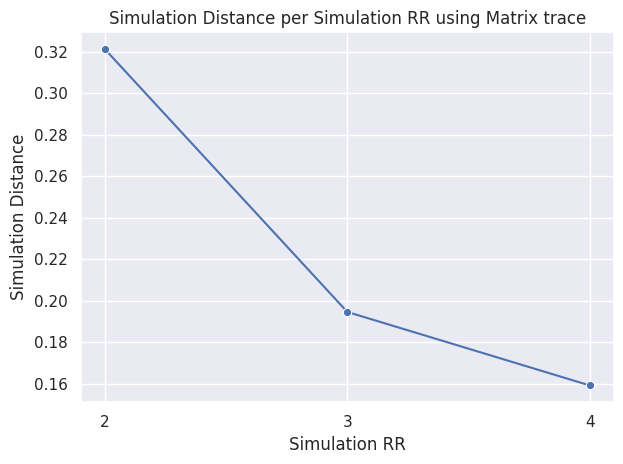

In [19]:
plt.figure()
sns.lineplot(
  data=df_dist,
  x="simu_rr",
  y="distance",
  marker="o",
  errorbar="ci",
)

plt.xlabel("Simulation RR")
plt.ylabel("Simulation Distance")
plt.title("Simulation Distance per Simulation RR using Matrix trace")
plt.grid(True)
plt.xticks(sorted(df_dist["simu_rr"].unique()))
plt.tight_layout()
plt.show()